In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Loading the data to a Pandas DataFrame

insu_cost_data = pd.read_csv('D:/Data Trained/Internship/Projects/Project Details/02-Medical cost personal insurance Project/medical_cost_insurance.csv')
insu_cost_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Rows and Columns details of the data

insu_cost_data.shape

(1338, 7)

In [4]:
#checking if any missing values/null values in the data

insu_cost_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#checking if any duplicate values in the data

insu_cost_data.duplicated().sum()

1

In [6]:
#checking no. of unique values in all the attributes

insu_cost_data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
#Statistical details of the red wine data

insu_cost_data.describe() #this will only access the numerical details from the data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#general information of the data set

insu_cost_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


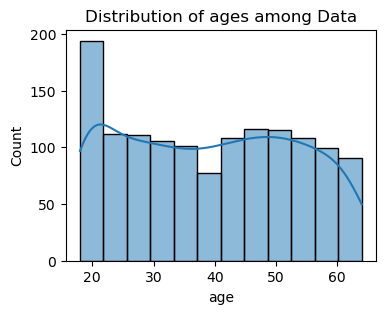

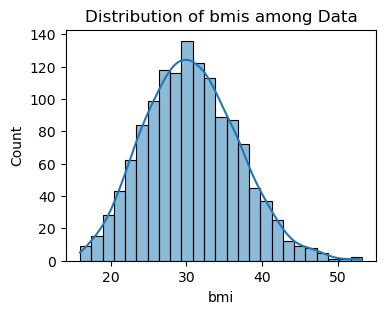

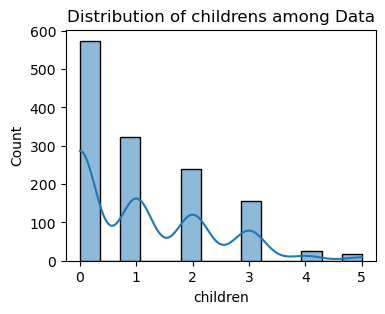

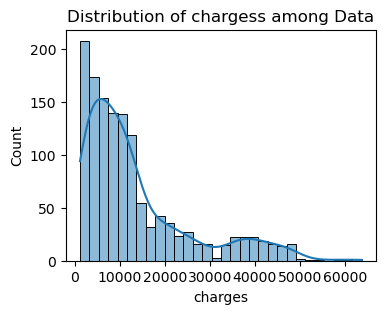

In [9]:
#Visualizing the distribution of Numerical attribute columns of the data

numeric_features = insu_cost_data.select_dtypes(include=['number']).columns #selecting all the numeric columns from the data

for num_feature in numeric_features:
    plt.figure(figsize=(4,3))
    sns.histplot(insu_cost_data[num_feature], kde=True) #kde=True will give smother line on the varying frequency for better visuals
    plt.title(f'Distribution of {num_feature}s among Data')
    plt.xlabel(num_feature) #giving feature name to the plot in x-axis
    plt.show()

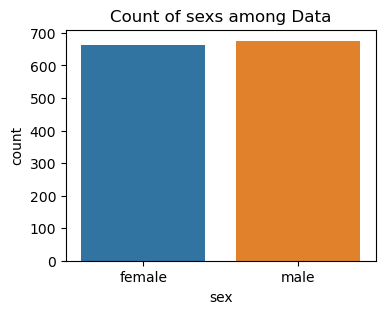

sex
male      676
female    662
Name: count, dtype: int64


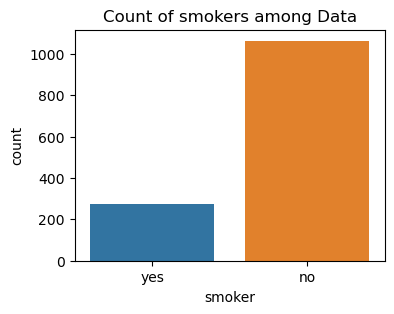

smoker
no     1064
yes     274
Name: count, dtype: int64


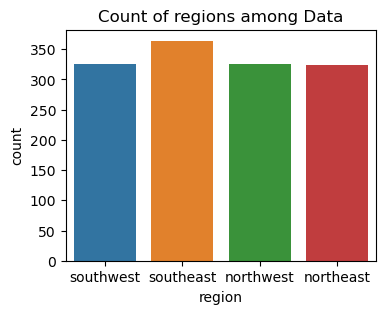

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [10]:
#Visualizing the distribution of categorical features: Sex, Smoke and Region columns of the data

nonnumeric_features = insu_cost_data.select_dtypes(exclude=['number']).columns #selecting all the non-numeric columns from the data

for nonum_feature in nonnumeric_features:
    plt.figure(figsize=(4,3))
    sns.countplot(data=insu_cost_data, x=insu_cost_data[nonum_feature]) #kde=True will give smother line on the varying frequency for better visuals
    plt.title(f'Count of {nonum_feature}s among Data')
    plt.xlabel(nonum_feature) #giving feature name to the plot in x-axis
    plt.show()
    print(insu_cost_data[nonum_feature].value_counts()) #to print the exact count of the distribution under the plot

In [11]:
#Classifying the categorical columns into integer numbers

#Encoding 'sex' column
insu_cost_data.replace({'sex':{'male':1, 'female':0}}, inplace=True) #inplace=True whill ensure successful replacement of given condition for all the instances

#Encoding 'smoker' column
insu_cost_data.replace({'smoker':{'no':1, 'yes':0}}, inplace=True)

#Encoding 'region' column
insu_cost_data.replace({'region':{'southeast':0, 'southwest':1, "northeast":2, "northwest":3}}, inplace=True)

In [12]:
#Data Pre-processing to prepare for the model by Encoding all the categorical features as an integer value

x_para = insu_cost_data.drop(columns='charges', axis=1) #axis=1 indicates a column, if we do not specify it then it will consider a row by Default 
y_para = insu_cost_data['charges']

In [13]:
x_para

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,0
2,28,1,33.000,3,1,0
3,33,1,22.705,0,1,3
4,32,1,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3
1334,18,0,31.920,0,1,2
1335,18,0,36.850,0,1,0
1336,21,0,25.800,0,1,1


In [14]:
y_para

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [15]:
#Splitting the preprocessed data into train and test data and target datas

x_para_train, x_para_test, y_para_train, y_para_test = train_test_split(x_para, y_para, test_size=0.2, random_state=2)

In [16]:
print(x_para.shape, x_para_train.shape, x_para_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [18]:
from sklearn.tree import DecisionTreeRegressor #applying Decision Tree Regression Model

tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(x_para_train, y_para_train)

DecisionTreeRegressor(max_depth=5)

In [20]:
#model evaluatin for the training data

y_pred_train = tree_model.predict(x_para_train)

mse_train = mean_squared_error(y_para_train, y_pred_train)
r2_train = r2_score(y_para_train, y_pred_train)

print(f'The Mean Squared Error of the predicted Training data is: {mse_train}')
print(f'The R Squared value of the predicted Training data is: {r2_train}\n')


#model evaluatin for the test data
y_pred_test = tree_model.predict(x_para_test) 

mse_test = mean_squared_error(y_para_test, y_pred_test)
r2_test = r2_score(y_para_test, y_pred_test)

print(f'The Mean Squared Error of the Test data is: {mse_test}')
print(f'The R Squared value of the Test data is: {r2_test}')

The Mean Squared Error of the predicted Training data is: 17379238.559156172
The R Squared value of the predicted Training data is: 0.8806179604926337

The Mean Squared Error of the Test data is: 21255528.868393764
The R Squared value of the Test data is: 0.8584670325507388


In [22]:
#prediction process with Manual input of the required data

age_data = int(input('Enter the Age: '))
sex_data = int(input('Enter 1 for male and 0 for female: '))
bmi_data = float(input('Enter the BMI (Tentative range: 15.960000 to 53.130000):  '))
children_data = int(input('Enter the no. of childrens: '))
smoker_data = int(input('Enter the smoking activities (0 for yes and 1 for no): '))
region_data = int(input('Enter the region code as southeast =0, southwest=1, northeast=2, northwest=3 : '))

customer_data = (age_data, sex_data, bmi_data, children_data, smoker_data, region_data)

customer_data_array = np.asarray(customer_data) #converting input data to numpy array for easy operations

reshape_customer_data = customer_data_array.reshape(1,-1) #reshaping the data as 2D array from 1D

predicting_userinput_data = tree_model.predict(reshape_customer_data)

print("The predicted insurance charges are: Rs.",predicting_userinput_data[0], "\n")

Enter the Age: 26
Enter 1 for male and 0 for female: 1
Enter the BMI (Tentative range: 15.960000 to 53.130000):  33.33
Enter the no. of childrens: 0
Enter the smoking activities (0 for yes and 1 for no): 1
Enter the region code as southeast =0, southwest=1, northeast=2, northwest=3 : 1
The predicted insurance charges are: Rs. 4642.290031157895 



C:\Users\praje\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [23]:
#Prediction process for any one of the given data

customer_data1 = x_para.iloc[int(input("Select the row-index from the data: "))].to_numpy() #selecting user input for raw-index to do a prediction

customer_data_array1 = np.asarray(customer_data1) #converting input data to numpy array for easy operations

reshape_customer_data1 = customer_data_array1.reshape(1,-1) #reshaping the data as 2D array from 1D

predicting_userinput_data1 = tree_model.predict(reshape_customer_data1)

print("The predicted insurance charges are: Rs.",predicting_userinput_data1[0], "\n")

Select the row-index from the data: 7
The predicted insurance charges are: Rs. 7368.266610437959 



C:\Users\praje\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


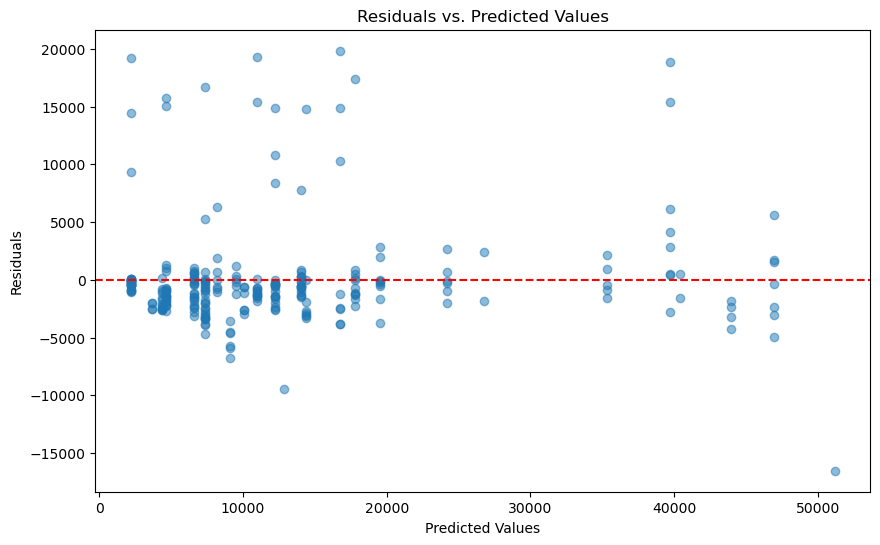

In [24]:
#Visualizing the Residual structure with reference to the Predicted values 

import matplotlib.pyplot as plt

residuals = y_para_test - y_pred_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [ ]:
#CONCLUSION:

#The R2 value from training data and testing data is near to 1 which indicates the Good performance of the model I have applied.

#The higher MSE values of training & testing data but close to each-other, can be considered valid in this case as the actual targated values(charges column) are higher values.

#The Residuals are mostly scattered around 0, which is ensuring the the best suitability of the Model for the given data.